In [5]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
import numpy as np

In [6]:
dataset = pd.read_csv("https://s3-us-west-2.amazonaws.com/jobseekersregression/steves_labels.tsv", sep='\t')

In [7]:
valuable_columns = [
    "Duration numeric",
    "Level numeric",
    "Size numeric",
    "Revenue numeric",
    "Size numeric",
    "Quality of Network"
]

label_columns = [
    "Potential_success",
    "Increase_revenue"
]

for column in valuable_columns + label_columns:
    dataset[column] = pd.to_numeric(dataset[column])

In [9]:
features = dataset[valuable_columns]
labels = dataset[label_columns]
validation_size = 0.33
seed = 7

features_train, features_validation, labels_train, labels_validation =\
    cross_validation.train_test_split(features, labels, test_size=validation_size, random_state=seed)

In [10]:
regression = LinearRegression()
regression.fit(features_train, labels_train)
print("Coefficients:\n", regression.coef_)
regression.score(features_validation, labels_validation)

Coefficients:
 [[  1.35941439  14.95443772   0.64098622  12.16282912   0.64098622
    4.03590969]
 [  1.77345378  22.62648454   0.52691858  18.92342909   0.52691858
    5.87406138]]


0.71341175277772118

In [11]:
prediction = regression.predict(features_validation)
prediction_dataframe = pd.DataFrame(prediction)

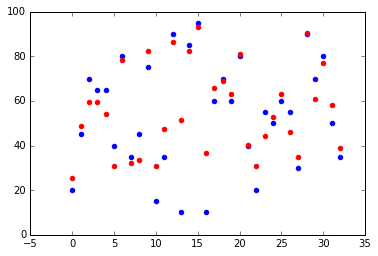

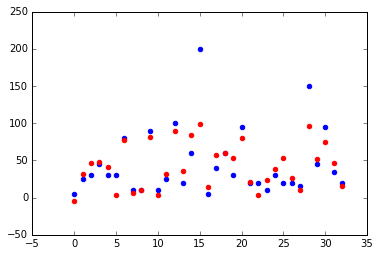

In [12]:
def plot_sets(ax, sets):
    for set_to_plot, color in sets:
        plt.scatter(range(len(ax)), set_to_plot, color=color)
        
    plt.xticks()
    plt.yticks()
    plt.show()
    
for index, column in enumerate(label_columns):
    plot_sets(ax=features_validation, sets=
                [
                    (labels_validation[column], "blue"),
                    (prediction_dataframe[index], "red"),
                ])